# 軸回転を考えてみる

In [1]:
import numpy as np
import matplotlib.pyplot as plt


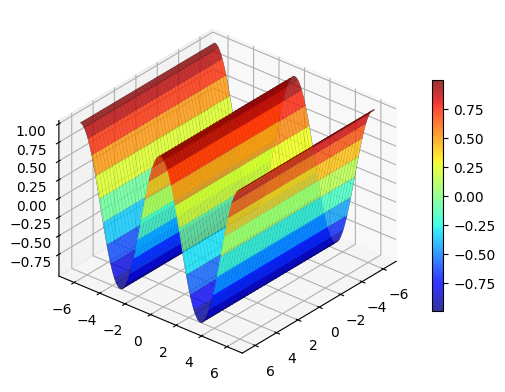

In [43]:
def func_surface(x, y):
#    return np.sin(x) + np.cos(y)
    return np.cos(y)

# メッシュを生成
x = np.linspace(-2*np.pi, 2*np.pi, 128)
y = np.linspace(-2*np.pi, 2*np.pi, 128)
X, Y = np.meshgrid(x, y)

# plot_surface で 3D にプロット
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'projection': '3d'})
ax.set_proj_type('persp', focal_length=100)
wire = ax.plot_wireframe(X, Y, func_surface(X, Y), color='k', lw=0.3, alpha=0.8)
surf = ax.plot_surface(X, Y, func_surface(X, Y), cmap='jet', alpha=0.8)

fig.colorbar(surf, ax=ax, shrink=0.5)

ax.view_init(elev=30, azim=40)

それじゃぁ，アニメーションを考えてみよう

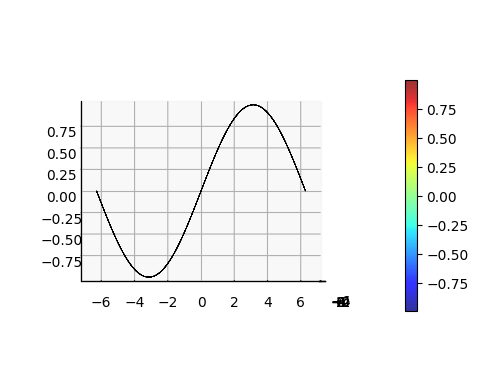

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def func_surface(x, y):
    return np.sin(y)


def update(frm_no, ax, max_frames):
    ax.cla()
    ax.grid()
    
    t = frm_no / max_frames
    T1 = 0.4
    T2 = 0.7
    if t < T1: # (elev, azim) = (0, 0) ---> (30, 40)
        elev = 30 / T1 * t
        azim = 40 / T1 * t
    elif t < T2:       # (elev, azim) = (30, 40) ---> (90, 0)
        elev = 30 + (90 - 30) / (T2 - T1) * (t - T1)
        azim = 40 - (40 - 0) / (T2 - T1) * (t - T1)
    else:
        elev = 90 + (0 - 90) / (1 - T2) * (t - T2)
        azim = 0

    rng = np.linspace(-np.pi, np.pi, 128)
    x, y = np.meshgrid(rng, rng)
    
    ax.set_proj_type('persp', focal_length=100)
    wire = ax.plot_wireframe(X, Y, func_surface(x, y), color='k', lw=0.3, alpha=0.8)
    surf = ax.plot_surface(X, Y, func_surface(x, y), cmap='jet', alpha=0.8)


    ax.view_init(elev=elev, azim=azim)

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'projection': '3d'})
MaxFrames = 120
fig.colorbar(surf, ax=ax, shrink=0.5)

#update(0, ax, MaxFrames)

anim = FuncAnimation(fig, update, frames=range(MaxFrames), 
                     fargs=(ax, MaxFrames), interval=100, repeat = True)
anim.save('TmpImages/rotatesin.mp4', writer='ffmpeg')
